In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer

import warnings

warnings.filterwarnings('ignore')

## Step 1: Load the dataset

In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/ML Projects/Cognifyz Technologies/MACHINE LEARNING TASK LIST AND DATASET/Restaurant_Reviews.csv'
df = pd.read_csv(file_path)

In [ ]:
# Display the first few rows of the dataset
display(df.head())

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Step 2: Preprocess the data

### 2.1 Handle missing values

In [ ]:
# Drop rows with missing 'Cuisines' as it is the target variable
df = df.dropna(subset=['Cuisines'])

In [ ]:
# Fill missing values in other columns with appropriate strategies
df.fillna({'Average Cost for two': df['Average Cost for two'].median(),
           'Aggregate rating': df['Aggregate rating'].mean()}, inplace=True)

### 2.2 Encode categorical variables

In [ ]:
# Label Encoding for binary columns (Yes/No)
binary_columns = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
for col in binary_columns:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
# One-hot encoding for other categorical variables
df = pd.get_dummies(df, columns=['Currency', 'Rating color', 'Rating text', 'Country Code', 'City'], drop_first=True)

In [ ]:
# Encode the target variable (Cuisines)
cuisine_encoder = LabelEncoder()
df['Cuisines'] = cuisine_encoder.fit_transform(df['Cuisines'])

## Step 3: Feature selection

In [ ]:
X = df.drop(['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose', 'Cuisines'], axis=1)
y = df['Cuisines']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 4: Train the model

In [ ]:
# Using Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Step 5: Evaluate the model

In [ ]:
# Predictions
y_pred = clf.predict(X_test)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.10


In [ ]:
# Classification report
print("\nClassification Report:")
unique_labels = list(set(y_test) | set(y_pred))
print(classification_report(y_test, y_pred, labels=unique_labels, target_names=[cuisine_encoder.inverse_transform([label])[0] for label in unique_labels]))


Classification Report:
                                                                                          precision    recall  f1-score   support

                                                                                 Afghani       0.00      0.00      0.00         0
                                                               Afghani, Mughlai, Chinese       0.00      0.00      0.00         1
                                                                                 African       0.00      0.00      0.00         0
                                                                     African, Portuguese       0.00      0.00      0.00         0
                                                                                American       0.00      0.00      0.00         3
                                                      American, Asian, European, Seafood       0.00      0.00      0.00         0
                                                                 

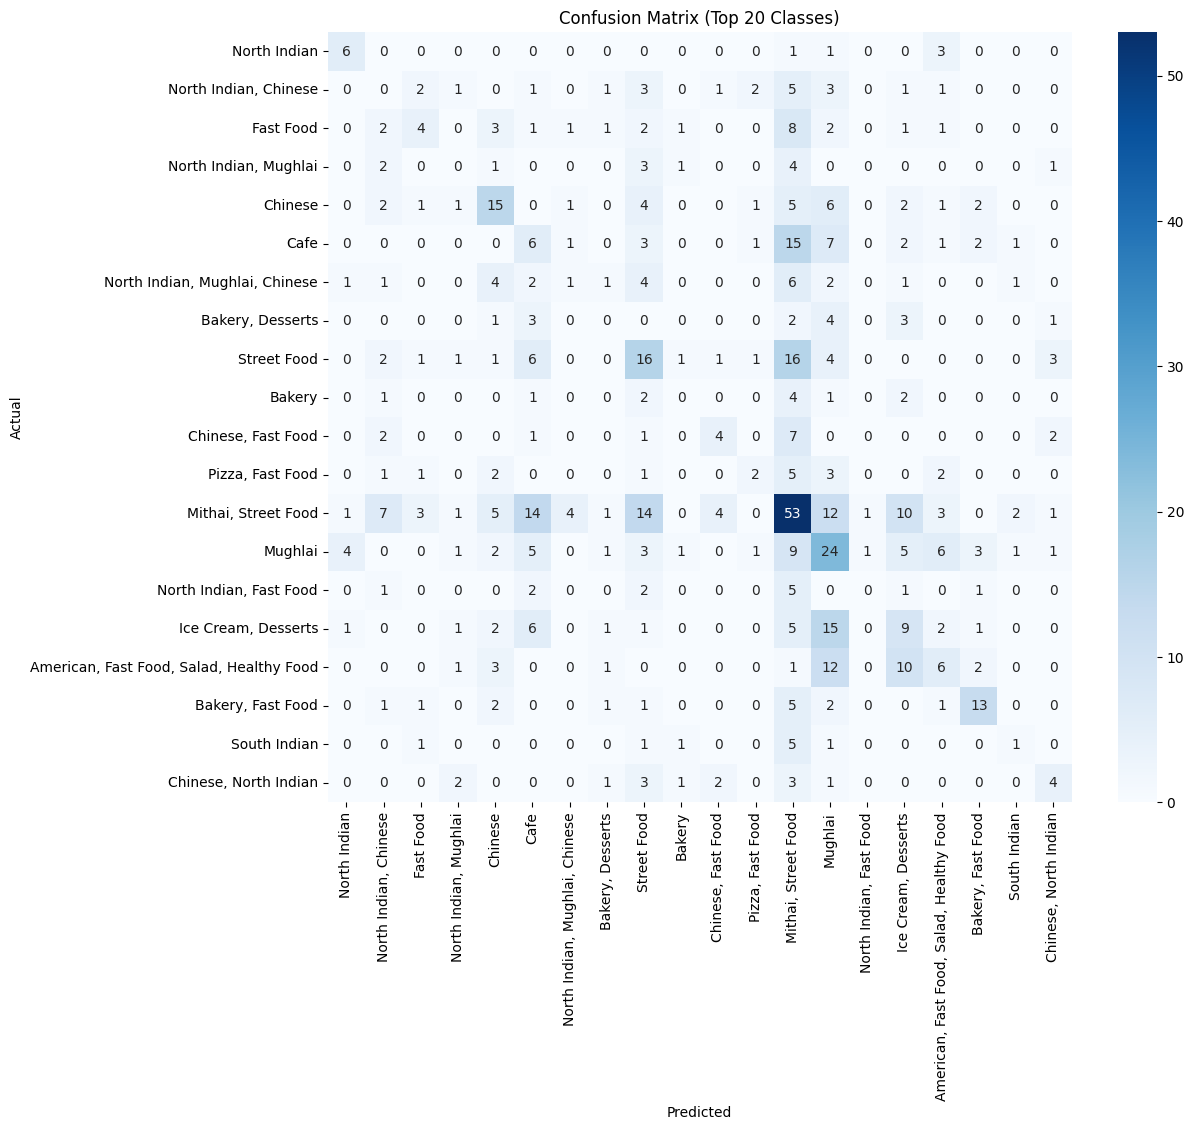

In [ ]:
# Confusion Matrix (simplified for visualization)
cm = confusion_matrix(y_test, y_pred, labels=unique_labels)

# Limit the number of labels for visualization
# Select the top 20 classes based on their frequency in the test set
top_classes = pd.Series(y_test).value_counts().nlargest(20).index
filtered_cm = cm[np.isin(unique_labels, top_classes)][:, np.isin(unique_labels, top_classes)]

# Update the label mapping for the top classes
top_labels = [cuisine_encoder.inverse_transform([label])[0] for label in top_classes]

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_cm, annot=True, fmt='d', cmap='Blues', xticklabels=top_labels, yticklabels=top_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Top 20 Classes)')
plt.show()


## Step 6: Analyze performance across cuisines

In [ ]:
# Count distribution of actual cuisines
distribution_actual = pd.Series(y_test).value_counts(normalize=True)

# Count distribution of predicted cuisines
distribution_predicted = pd.Series(y_pred).value_counts(normalize=True)

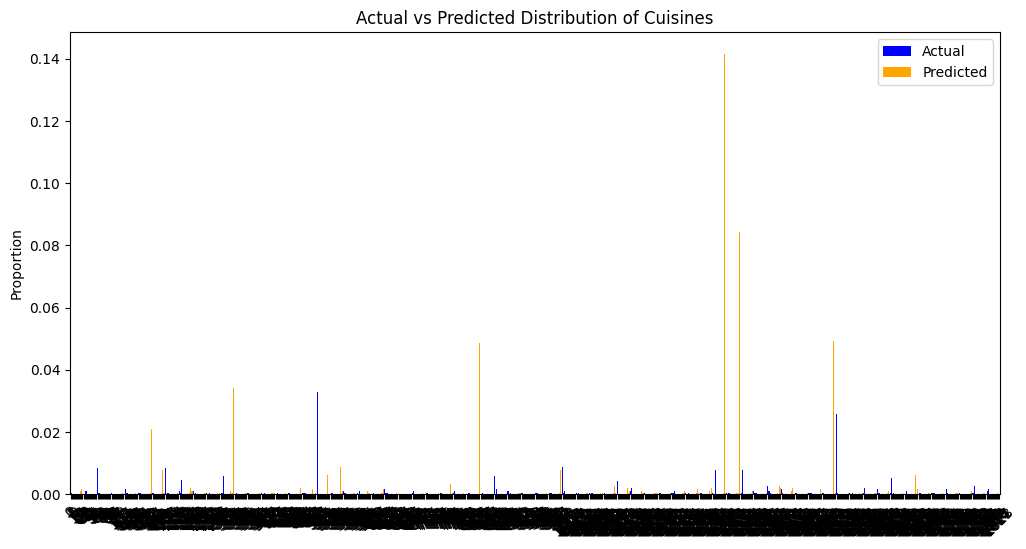

In [ ]:
# Visualize the comparison
comparison = pd.DataFrame({'Actual': distribution_actual, 'Predicted': distribution_predicted}).fillna(0)
comparison.plot(kind='bar', figsize=(12, 6), rot=45, color=['blue', 'orange'])
plt.title('Actual vs Predicted Distribution of Cuisines')
plt.ylabel('Proportion')
plt.show()

## Step 7: Identify challenges or biases

In [ ]:
# Example: Check for underrepresented cuisines in the dataset
cuisine_counts = pd.Series(y).value_counts()
print("Underrepresented Cuisines:")
print(cuisine_counts[cuisine_counts < 10])  # Threshold for underrepresentation

Underrepresented Cuisines:
Cuisines
257     9
1761    9
1170    9
833     9
465     9
       ..
225     1
1548    1
599     1
200     1
1110    1
Name: count, Length: 1726, dtype: int64
